In [21]:
import qiskit
import qiskit.quantum_info
from qoop.core.optimizer import adam
import numpy as np
import constant, cost_func, circuit
%load_ext autoreload
%autoreload 2
import constant
import pennylane as qml
from pennylane import numpy as np
import autograd.numpy as np_grad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
import math

target = None
def target_func(num_qubits, num_layers, active_blocks):
    dev = qml.device('default.qubit', wires=num_qubits)
    @qml.qnode(dev)
    def U3cry(num_qubits: int, num_layers: int, thetas, active_blocks: np.ndarray) -> tuple[qiskit.QuantumCircuit, np.ndarray]:
        k = 0
        index_params = 0
        for _ in range(num_layers):
            for i in range(num_qubits):
                for j in range(i + 1, num_qubits):
                    if active_blocks[k] == 1:
                        qml.U3(thetas[index_params],thetas[index_params + 1],thetas[index_params + 2],i)
                        qml.U3(thetas[index_params + 3],thetas[index_params + 4],thetas[index_params + 5],j)
                        qml.CNOT([j, i])
                        index_params += 6
                    k += 1
        return qml.

    
    costs, thetass = [], []

    def cost(thetas):
        return cost_func.c_hst(qml.matrix(U3cry)(num_qubits, num_layers, thetas, active_blocks), target)
    opt = qml.AdamOptimizer(stepsize=0.1, beta1=0.9, beta2=0.99, eps=1e-6)
    steps = 50
    thetas = np.random.uniform(0, 2*np.pi, constant.num_params_on_active_blocks(active_blocks), requires_grad=True)
    costs = []

    for i in range(steps):
        params, loss = opt.step_and_cost(cost, thetas)
        costs.append(loss)
    return costs, thetass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
def circuit(theta):
    qml.RX(theta, wires=1)
    qml.Z(wires=0)
qml.matrix(circuit)(np.pi / 4)

ValueError: wire_order is required by qml.matrix() for quantum functions.

In [22]:
import time
from qiskit.circuit import ParameterVector
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary

from qiskit.circuit.library import UnitaryGate
num_qubits = 3
num_layers = 4

num_blocks = num_qubits*(num_qubits-1)//2

target = UnitaryGate(random_unitary(2**num_qubits))
active_blocks = np.ones(num_blocks * num_layers)
costs, thetass = target_func(num_qubits, num_layers, active_blocks)
plt.plot(costs)

QuantumFunctionError: A quantum function must return either a single measurement, or a nonempty sequence of measurements.

0.014228517028724075


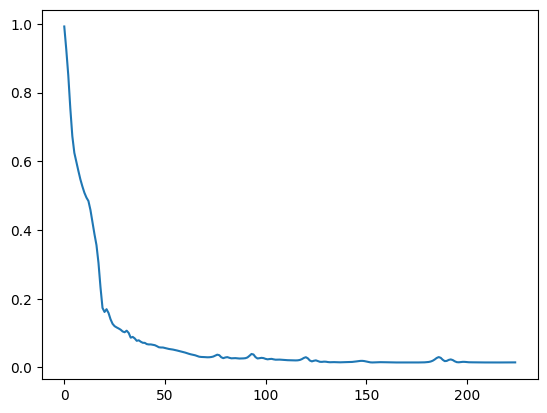

In [10]:
import matplotlib.pyplot as plt
print(np.min(costs))
plt.plot(costs)

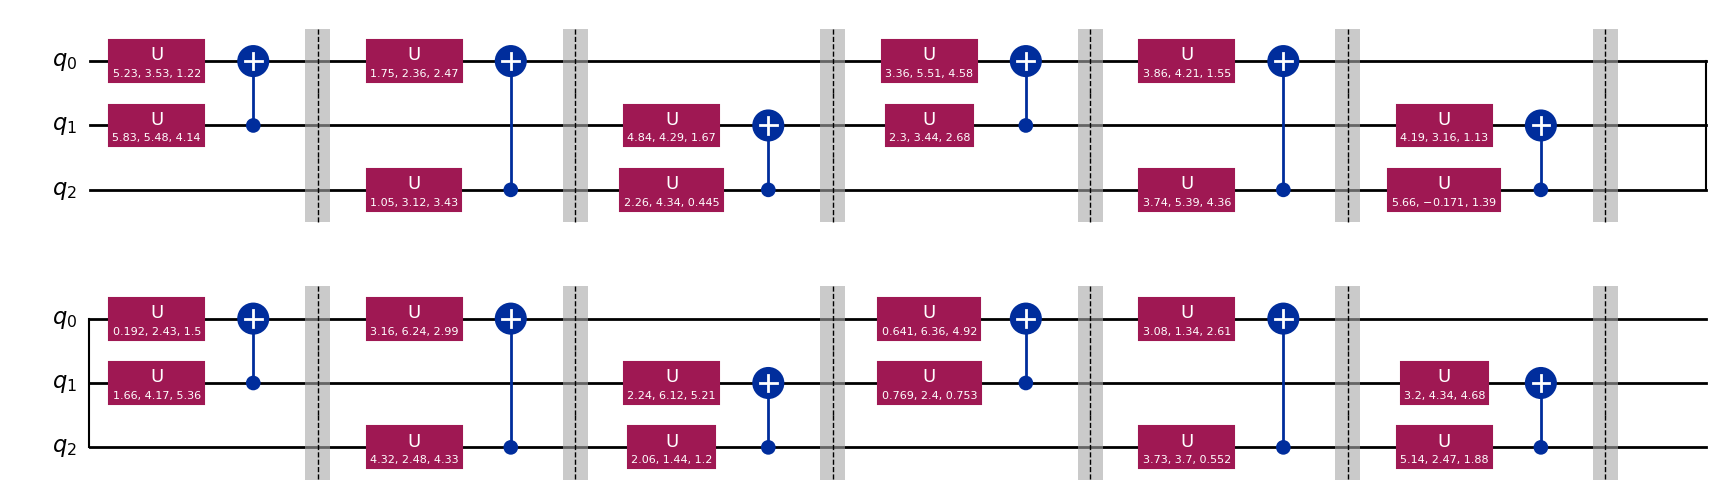

In [12]:
import qiskit
num_qubits = 3
num_layers = 4
num_blocks = num_qubits*(num_qubits-1)//2

active_blocks = np.ones(num_blocks * num_layers) # [0, 1, 1, 1, 1, 1, 1, 1, 1]
#thetas = np.random.uniform(0, 2*np.pi, num_params_on_active_blocks(active_blocks))
qc_x = U3cry_qc(num_qubits, num_layers, thetass[-1], active_blocks)
qc_excipilit = qiskit.transpile(qc_x, optimization_level=3)
qc_excipilit.draw('mpl')

In [11]:
num_qubits = 3
num_layers = 3
active_blocks = np.ones((num_qubits*(num_qubits-1)//2) * num_layers) # num_blocks = num_qubits*(num_qubits-1)//2
def check(active_blocks):
    costs, _ = target_func(num_qubits, num_layers, active_blocks)
    print(np.min(costs))
    if costs[-1] < 0.001:
        return True
    return False
    # return xs[2] == 0 and xs[5] == 1
for i in range(len(active_blocks)):
    previous_sum = np.sum(active_blocks)
    for j in range(len(active_blocks)):
        if active_blocks[j] == 1:
            active_blocks[j] = 0
            print("I'm testing ...")
            k = check(active_blocks)
            print(f"{active_blocks} is {k}")
            if k == False:
                active_blocks[j] = 1
    if np.sum(active_blocks) == previous_sum:
        break
            
print(active_blocks)

I'm testing ...
Converged
1.6680962506843144e-06
[0. 1. 1. 1. 1. 1. 1. 1. 1.] is True
I'm testing ...
Converged
0.14647275877137966
[0. 0. 1. 1. 1. 1. 1. 1. 1.] is False
I'm testing ...
Converged
0.271448550313927
[0. 1. 0. 1. 1. 1. 1. 1. 1.] is False
I'm testing ...
Converged
0.5000132683317959
[0. 1. 1. 0. 1. 1. 1. 1. 1.] is False
I'm testing ...
Converged
0.14644722536582588
[0. 1. 1. 1. 0. 1. 1. 1. 1.] is False
I'm testing ...
Converged
0.14645055764157655
[0. 1. 1. 1. 1. 0. 1. 1. 1.] is False
I'm testing ...
Converged
0.1464482612318152
[0. 1. 1. 1. 1. 1. 0. 1. 1.] is False
I'm testing ...
Converged
0.14646534665934885
[0. 1. 1. 1. 1. 1. 1. 0. 1.] is False
I'm testing ...
Converged
0.14644770277961128
[0. 1. 1. 1. 1. 1. 1. 1. 0.] is False
I'm testing ...
Converged
0.14644749511165311
[0. 0. 1. 1. 1. 1. 1. 1. 1.] is False
I'm testing ...
Converged
0.14645090450540021
[0. 1. 0. 1. 1. 1. 1. 1. 1.] is False
I'm testing ...
Converged
0.43750383559418826
[0. 1. 1. 0. 1. 1. 1. 1. 1.] is 